In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import json
import vk_api
import requests
import random
from io import BytesIO
import requests
import seaborn as sns

In [2]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/step_1_lesson_7.csv')

In [3]:
df

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


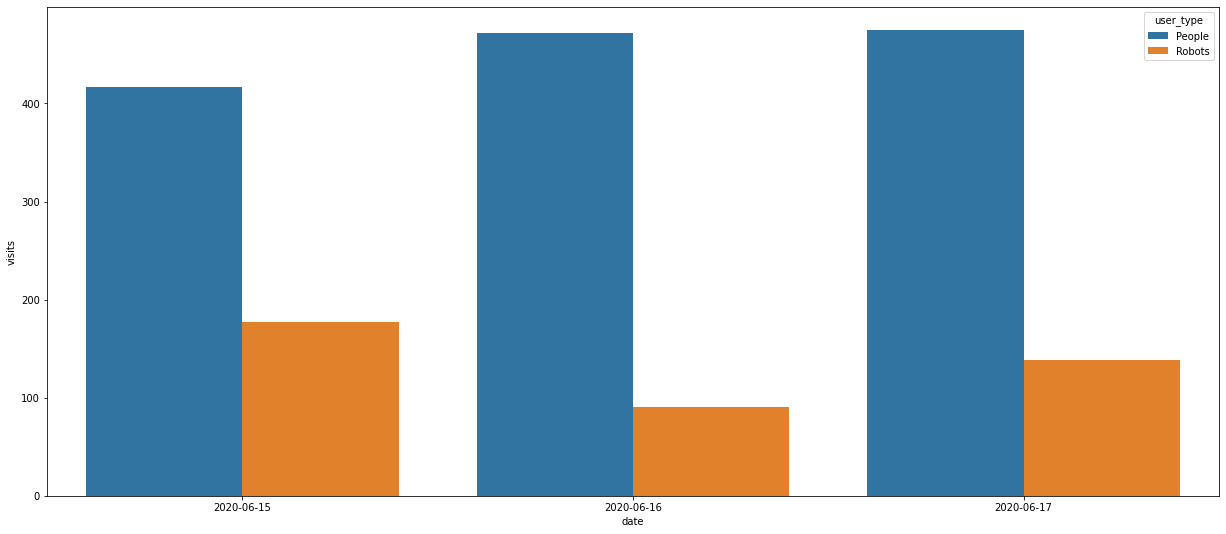

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (21,9)
sns.barplot(x='date', y='visits', data=df, hue = 'user_type')

In [5]:
step2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/step_2_lesson_7.csv')

In [6]:
step2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [7]:
step2.query('browser ==  "Google Chrome"')

,date,browser,visits
0,2020-06-15,Google Chrome,354.0


In [8]:
step2.visits.sum()

594.0

In [9]:
(345 / 594) * 100

58.080808080808076

In [10]:
step3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/step_3_lesson_7.csv')

In [11]:
step3

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [12]:
step3.groupby(['browser', 'user_type'], as_index = False) \
.agg({'visits' : 'sum'}) \
.query('user_type == "Robots"') \

,browser,user_type,visits
3,Chromium,Robots,1.0
6,Edge,Robots,1.0
8,Firefox,Robots,31.0
10,Google Chrome,Robots,104.0
12,Mobile Safari,Robots,1.0
14,Opera,Robots,5.0
16,Safari,Robots,22.0
18,Samsung Internet,Robots,1.0
19,UCWEB,Robots,4.0
22,Yandex Browser,Robots,7.0


In [13]:
step4 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/step_4_lesson_7.csv')

In [14]:
step4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [15]:
step4_1 = step4.groupby(['browser', 'user_type'], as_index = False) \
.agg({'visits' : 'sum'})


In [16]:
step4_1

,browser,user_type,visits
0,Android Browser,People,1.0
1,Chrome Mobile,People,31.0
2,Chromium,People,1.0
3,Chromium,Robots,1.0
4,CocCoc,People,1.0
5,Edge,People,4.0
6,Edge,Robots,1.0
7,Firefox,People,27.0
8,Firefox,Robots,31.0
9,Google Chrome,People,250.0


In [22]:
(step4_1.visits / step4.visits.sum()) * 100

0      0.168350
1      5.218855
2      0.168350
3      0.168350
4      0.168350
5      0.673401
6      0.168350
7      4.545455
8      5.218855
9     42.087542
10    17.508418
11     2.525253
12     0.168350
13     1.851852
14     0.841751
15     3.198653
16     3.703704
17     1.346801
18     0.168350
19     0.673401
20     0.168350
21     7.912458
22     1.178451
23     0.168350
Name: visits, dtype: float64

In [23]:
# 7 урок 6 шаг

In [24]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials


# Specify path to your file with credentials
path_to_credential = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-tutov/gentle-presence-377308-97325098c711.json' 

# Specify name of table in google sheets
table_name = 'Project 7'

scope = ['https://spreadsheets.google.com/feeds',
         'https://www.googleapis.com/auth/drive']

credentials = ServiceAccountCredentials.from_json_keyfile_name(path_to_credential, scope)

gs = gspread.authorize(credentials)
work_sheet = gs.open(table_name)

# Select 1st sheet
sheet1 = work_sheet.sheet1

# Get data in python lists format
data = sheet1.get_all_values()

# Get header from data
headers = data.pop(0)

# Create df
df = pd.DataFrame(data, columns=headers)
df.head()

APIError: {'code': 403, 'message': 'Google Drive API has not been used in project 83374085914 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/drive.googleapis.com/overview?project=83374085914 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.', 'errors': [{'message': 'Google Drive API has not been used in project 83374085914 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/drive.googleapis.com/overview?project=83374085914 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.', 'domain': 'usageLimits', 'reason': 'accessNotConfigured', 'extendedHelp': 'https://console.developers.google.com'}], 'status': 'PERMISSION_DENIED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Google developers console API activation', 'url': 'https://console.developers.google.com/apis/api/drive.googleapis.com/overview?project=83374085914'}]}, {'@type': 'type.googleapis.com/google.rpc.ErrorInfo', 'reason': 'SERVICE_DISABLED', 'domain': 'googleapis.com', 'metadata': {'service': 'drive.googleapis.com', 'consumer': 'projects/83374085914'}}]}